1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [77]:
# Importando Librerias de regresion logistic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
conjuntoDatos = pd.read_csv('./Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv')
conjuntoDatos.head(297)


,edad,sexo,dolor_toracico,presion_arterial,colesterol_mg/dl,glicemia,electrocardio,frecuencia,angina,deprecion,pendiente,num_vasos,defecto,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Importamos las diferentes librerias y el data set dataframe que nos ayudaran a realizar el arbol de decicsión e imprimimos el dataframe con 50 registros o filas llamado conjutoDatos para desarrollar la actividad.

In [78]:
#imprimimos la informacion de las columnas del dataframe
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              297 non-null    int64  
 1   sexo              297 non-null    int64  
 2   dolor_toracico    297 non-null    int64  
 3   presion_arterial  297 non-null    int64  
 4   colesterol_mg/dl  297 non-null    int64  
 5   glicemia          297 non-null    int64  
 6   electrocardio     297 non-null    int64  
 7   frecuencia        297 non-null    int64  
 8   angina            297 non-null    int64  
 9   deprecion         297 non-null    float64
 10  pendiente         297 non-null    int64  
 11  num_vasos         297 non-null    int64  
 12  defecto           297 non-null    int64  
 13  condition         297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Imprimimos la información del dataframe para saber si hay datos faltantes

In [79]:
#Imprimimos la variable Objetivo para su analisis
conjuntoDatos[["condition"]]

,condition
0,0
1,0
2,0
3,1
4,0
...,...
292,1
293,1
294,1
295,0


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

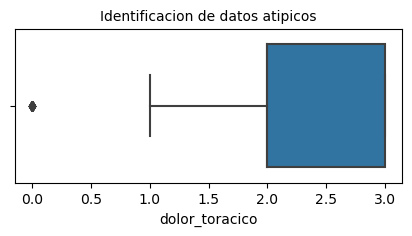

In [80]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["dolor_toracico"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

La grafica muetra que exsten datos atipicos pero esos datos pertenecen a la ausencia de dolores a nivele de torax y una persona puede tener o no dolor.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

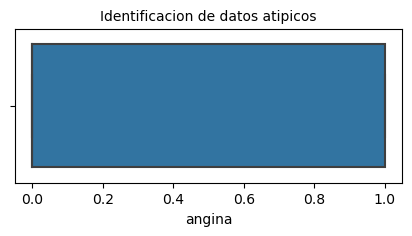

In [81]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["angina"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

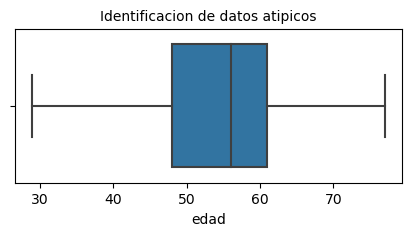

In [82]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["edad"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

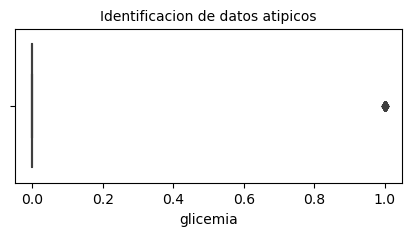

In [83]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["glicemia"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos las variables predictoras de manera que podamos saber si existen datos atipicos o erroneos

In [84]:
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Edad:", conjuntoDatos['edad'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Dolor Toracico:", conjuntoDatos['dolor_toracico'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Presion Arterial:", conjuntoDatos['presion_arterial'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Anginas:", conjuntoDatos['angina'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Glicemia:", conjuntoDatos['glicemia'].isin([0]).sum())
print("Cantidad de registros 0 en la columna frecuencia cardiaca:", conjuntoDatos['frecuencia'].isin([0]).sum())
print("Cantidad de registros 0 en la columna colesterol_mg/dl:", conjuntoDatos['colesterol_mg/dl'].isin([0]).sum())
print("----------------------------------------------------------")

---------------------------------------------------------
Cantidad de registros null en la columna Edad: 0
Cantidad de registros 0 en la columna Dolor Toracico: 23
Cantidad de registros 0 en la columna Presion Arterial: 0
Cantidad de registros 0 en la columna Anginas: 200
Cantidad de registros 0 en la columna Glicemia: 254
Cantidad de registros 0 en la columna frecuencia cardiaca: 0
Cantidad de registros 0 en la columna colesterol_mg/dl: 0
----------------------------------------------------------


Imprimimos la suma de las columnas con datos 0 y identificamos si esos valores son relevantes para el analisis de regresión logistica.

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [85]:
conjuntoDatos["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

Contamos e imprimimos la cantidad de valores 0 como 1  en la columna condition columna objetivo del analisis.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

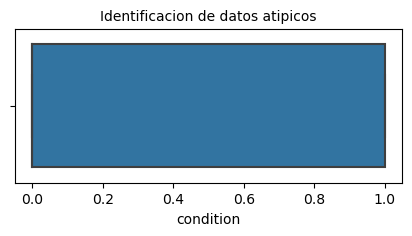

In [86]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["condition"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos la variable Objetivo y no encontramos datos atpicos.

Text(0.5, 1.0, 'Identificacion de datos atipicos')

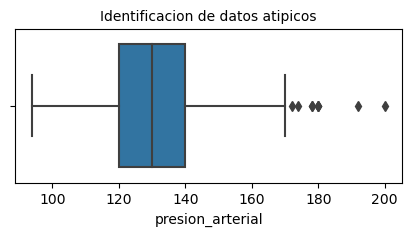

In [87]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["presion_arterial"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Graficamos la variable presion arterial importante para el analisis de enfermedad cardiaca y vemos datos atipicos o erroneos entonces nos disponemos a identificarlos.

In [88]:
#Datos atipicos en presion arterial.
nivelminpresion = 115
nivelmaxpresion = 160
datosAtipicos = ((conjuntoDatos['presion_arterial'] < nivelminpresion)|
                 (conjuntoDatos['presion_arterial'] > nivelmaxpresion)).sum()
print("Cantidad de datos atipicos en Presion Arterial es: {}".format(datosAtipicos))


Cantidad de datos atipicos en Presion Arterial es: 64


In [89]:
onjuntoDatos = conjuntoDatos[(conjuntoDatos['presion_arterial']< nivelminpresion) & 
                             (conjuntoDatos['presion_arterial']> nivelmaxpresion)]

In [90]:
datosAtipicos = ((conjuntoDatos['presion_arterial'] < nivelminpresion)|
                 (conjuntoDatos['presion_arterial'] > nivelmaxpresion)).sum()
print("Cantidad de datos atipicos en Presion Arterial es: {}".format(datosAtipicos))

Cantidad de datos atipicos en Presion Arterial es: 64


In [91]:
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              297 non-null    int64  
 1   sexo              297 non-null    int64  
 2   dolor_toracico    297 non-null    int64  
 3   presion_arterial  297 non-null    int64  
 4   colesterol_mg/dl  297 non-null    int64  
 5   glicemia          297 non-null    int64  
 6   electrocardio     297 non-null    int64  
 7   frecuencia        297 non-null    int64  
 8   angina            297 non-null    int64  
 9   deprecion         297 non-null    float64
 10  pendiente         297 non-null    int64  
 11  num_vasos         297 non-null    int64  
 12  defecto           297 non-null    int64  
 13  condition         297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [92]:

ejeX = conjuntoDatos.drop('condition',axis=1)
ejeY = conjuntoDatos['condition']
ejeX_train, ejeX_test, ejeY_train, ejeY_test = train_test_split(ejeX,ejeY, test_size=0.25, random_state=0)

In [93]:
print(ejeX_train)

     edad  sexo  dolor_toracico  presion_arterial  colesterol_mg/dl  glicemia  \
159    68     1               3               144               193         1   
90     62     1               2               130               231         0   
269    48     1               3               130               256         1   
157    70     1               3               145               174         0   
198    60     1               3               130               206         0   
..    ...   ...             ...               ...               ...       ...   
251    53     0               3               130               264         0   
192    61     1               3               120               260         0   
117    52     1               2               172               199         1   
47     52     1               1               134               201         0   
172    65     1               3               120               177         0   

     electrocardio  frecuen

In [94]:
print(ejeY_train)

159    1
90     0
269    1
157    1
198    1
      ..
251    0
192    1
117    0
47     0
172    0
Name: condition, Length: 222, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [95]:
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression(solver = "liblinear")
regresion_logistica.fit(ejeX_train, ejeY_train)
prediccion = regresion_logistica.predict(ejeX_test)

In [96]:
print(ejeY_test)

111    0
150    0
12     1
216    1
139    0
      ..
27     0
218    0
256    0
37     0
92     0
Name: condition, Length: 75, dtype: int64


In [97]:
print(prediccion)

[0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0
 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [98]:
print(classification_report(ejeY_test, prediccion))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.92      0.80      0.86        41

    accuracy                           0.85        75
   macro avg       0.86      0.86      0.85        75
weighted avg       0.86      0.85      0.85        75



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

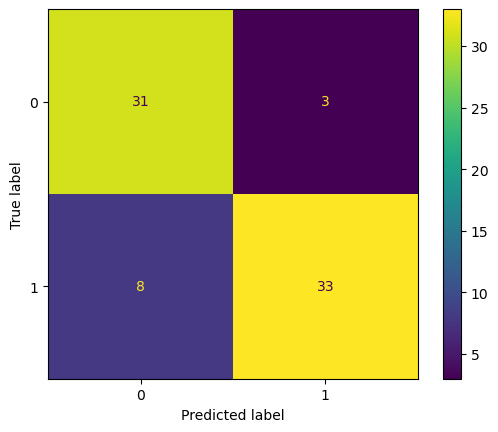

In [99]:
matriz_confusion = confusion_matrix(ejeY_test, prediccion)
visualizar = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizar.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

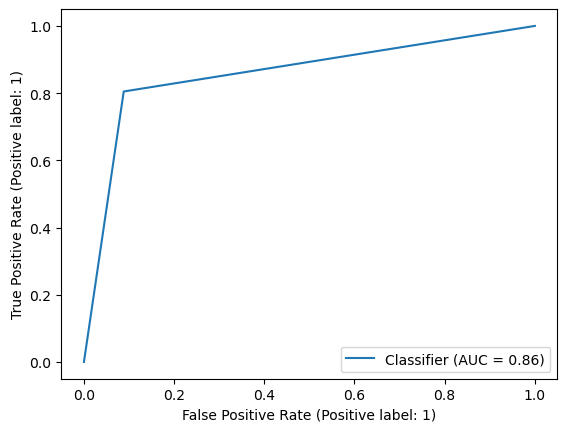

In [100]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ejeY_test, prediccion)
mplot.show

8. Interpretar, analizar y documentar los resultados obtenidos.

Despues de generar el modelo interpretamos, analizamos documentamos hallazgos:

1. PRECISION: La precisión de la predicción de la variable objetivo (condition) fue para lo que se dijo que tenian enfermedad cardiaca, siendo correctamente el  92% y para los que no tenian enfermedad cardiaca, el porcentaje correcto fue del 79%.

2. RECALL: La medición mostro para la clase objetivo (condition) del modelo el 80% de acierto, significa esto que         no tenian enfermedad cardiaca, se determinó correctamente a todos los diabeticos.

3. F1 SCORE: Encontramos un equilibrio del modelo en el 86% de la clase objetivo(condition).

Matriz de confusion interpretamos los datos generados.

1. VERDADEROOS POSITIVOS: Observamos que un clasificador predijo el recuento verdaderamente de 33.
2. VERDADEROS NEGATIVOS: Un clisificador predijo en las obsrvaciones que 31 eran falsos.
3. FALSOS POSITIVOS: El recuento de un clasificador en las observaciones predijo incorectamente que las verdaderas eran 3.
4. FALSOS NEGATIVOS: En las observaciones de un clasificador se predijo incorrectamente como falsas 8.

LA CURVA ROC.
Las predicciones son correctas en todos los limites mostrado en el AUC de la curva 86%.




